# Mini project: Movie review dataset exploration

In [23]:
!ls ./movielens

Icon_
README.txt
genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
tags.csv


In [12]:
!head -3 ./movielens/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy


In [13]:
!head -3 ./movielens/tags.csv

userId,movieId,tag,timestamp
18,4141,Mark Waters,1240597180
65,208,dark hero,1368150078


In [14]:
!head -3 ./movielens/ratings.csv

userId,movieId,rating,timestamp
1,2,3.5,1112486027
1,29,3.5,1112484676


## Research questions

- Top 10 rated movies for 1995 to 2015 each year, based on publishing year

- Top 10 popular tags each year

- Most popular movies for each year, based on the comment time

- Variability of rating along time

### Top 10 rated movies for 1995 to 2015 each year, based on publishing year

Preprocessing: parse the movie year from the movie name in movies.csv

In [89]:
import pandas as pd
movies = pd.read_csv('./movielens/movies.csv', sep = ',')
movie_year = movies['title'].str.extract('.*\((.*)\).*', expand=False)

movie_year = movie_year.rename(columns  = {0:'year'})

movie_year.unique()

In [92]:
movieyear = movie_year.str.extract(r'(?P<year>\d+)')

movieyear.year.unique()

In [94]:
movies['movieyear'] = movieyear

In [95]:
movies.head(5)

,movieId,title,genres,movieyear
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [96]:
ratings = pd.read_csv('./movielens/ratings.csv', sep = ',', parse_dates=['timestamp'])

In [97]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [100]:
avg_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index = False).mean()

In [101]:
avg_rating.head(3)

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040


In [102]:
merge1 = avg_rating.merge(movies, on = "movieId", how = 'inner')

In [103]:
merge1.head(3)

,movieId,rating,title,genres,movieyear
0,1,3.921240,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,3.211977,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,3.151040,Grumpier Old Men (1995),Comedy|Romance,1995


In [116]:
merge1 = merge1.dropna()
merge1.movieyear =  merge1.movieyear.astype('int32')

In [120]:
merge1.head()

,movieId,rating,title,genres,movieyear
0,1,3.921240,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,3.211977,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,3.151040,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,2.861393,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,3.064592,Father of the Bride Part II (1995),Comedy,1995


In [124]:
merge1[['title', 'rating','movieyear']].groupby('movieyear')['rating'].nlargest(5)

movieyear       
1891       26482    3.000000
1893       19160    3.375000
1894       19032    3.428571
           17597    2.714286
1895       25193    4.000000
           23633    2.250000
1896       20023    3.437500
           19265    2.928571
1898       18934    5.000000
           18964    5.000000
           16289    3.750000
           26481    3.000000
           25724    2.500000
1899       16294    3.625000
1900       24697    3.166667
1901       18980    5.000000
1902       9995     3.738189
1903       11460    3.340909
1905       25733    2.500000
1909       23948    3.000000
           25164    2.750000
           18656    2.500000
1910       22808    4.000000
           18815    3.466667
           21821    2.500000
1912       14245    3.892857
           17742    3.500000
           25958    3.500000
           23910    3.000000
           23950    2.333333
                      ...   
2010       21917    5.000000
           22818    5.000000
           23824    5.0000

In [26]:
tags = pd.read_csv('./movielens/tags.csv', sep =',')
tags.head(6)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876


In [28]:
!head -5 ./movielens/ratings.csv

userId,movieId,rating,timestamp
1,2,3.5,1112486027
1,29,3.5,1112484676
1,32,3.5,1112484819
1,47,3.5,1112484727


In [29]:
ratings = pd.read_csv('./movielens/ratings.csv', sep = ',', parse_dates=['timestamp'])

In [30]:
del ratings['timestamp']
del tags['timestamp']

In [32]:
tags.shape

(465564, 3)

In [33]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [34]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [37]:
import numpy as np

In [39]:

tags.iloc[range(0, 10, 2)]

,userId,movieId,tag
0,18,4141,Mark Waters
2,65,353,dark hero
4,65,592,dark hero
6,65,898,screwball comedy
8,65,1391,mars


In [50]:
tags.iloc[[0, 2, 5]]

,userId,movieId,tag
0,18,4141,Mark Waters
2,65,353,dark hero
5,65,668,bollywood


In [51]:
subset_h = ratings[ratings['rating']>4]

In [53]:
len(subset_h)

4433484

In [55]:
subset_h.shape[0]

4433484

In [56]:
subset_h.shape[0]/ ratings.shape[0]

0.22167128502260194

In [59]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [60]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [61]:
np.round(ratings['rating'].mean(), 2)

3.53

In [62]:
ratings.rating.max()

5.0

In [63]:
np.sum(ratings.userId == 2)

61

In [67]:
ratings.corr('kendall' )

,userId,movieId,rating
userId,1.000000,-0.001829,0.000937
movieId,-0.001829,1.000000,-0.015970
rating,0.000937,-0.015970,1.000000


In [66]:
?ratings.corr

In [72]:
filter1 = ratings.rating > 0
filter1.all()

True

In [71]:
filter2 = ratings.rating > 2

In [73]:
filter2.any()

True

In [75]:
movies.shape

(27278, 3)

In [76]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [77]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [78]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [79]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [80]:
tags.shape

(465564, 3)

In [81]:
tags = tags.dropna()

In [82]:
tags.shape

(465548, 3)

In [83]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

In [85]:
%matplotlib inline

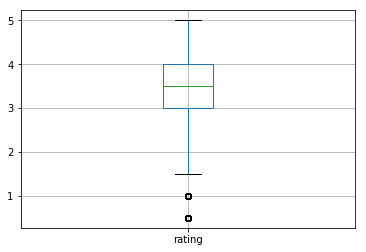

In [86]:
ratings.boxplot(column = 'rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0006A0C50>]],
      dtype=object)

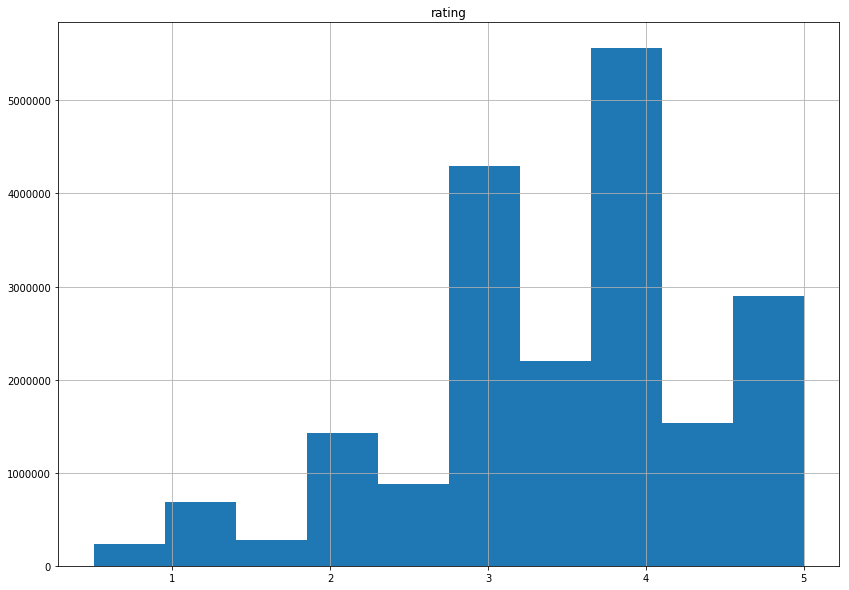

In [88]:
ratings.hist(column = 'rating', figsize = (14, 10))

In [90]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D00081B278>]],
      dtype=object)

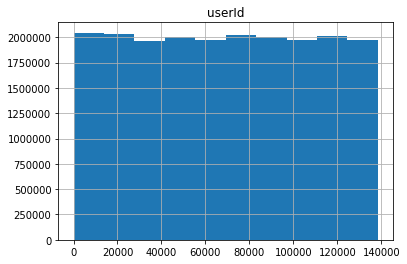

In [91]:
ratings.hist(column = 'userId')

In [92]:
flag = pd.Series(np.random.binomial(n = 1, p = .3, size = ratings.shape[0]), dtype = np.int64)

In [93]:
flag.describe()

count    2.000026e+07
mean     3.001523e-01
std      4.583240e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [94]:
ratings.insert(2, 'flag', flag)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0008C1940>]],
      dtype=object)

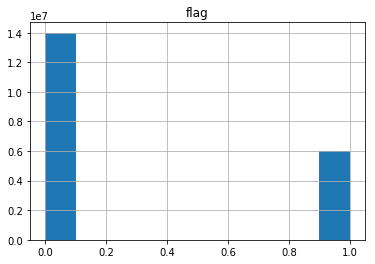

In [95]:
ratings.hist(column = 'flag')

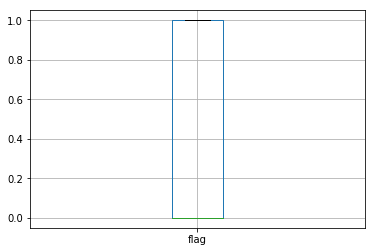

In [96]:
ratings.boxplot(column = 'flag')

In [98]:
ratings.groupby('userId').count().max()

movieId    9254
flag       9254
rating     9254
dtype: int64

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

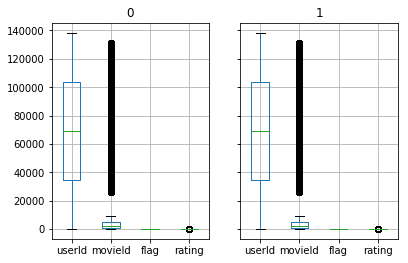

In [102]:
ratings.groupby('flag').boxplot()

In [106]:
ratings.groupby('userId').rating.mean().max()

5.0

In [108]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [109]:
tags[['userId', 'tag']].head(5)

,userId,tag
0,18,Mark Waters
1,65,dark hero
2,65,dark hero
3,65,noir thriller
4,65,dark hero


In [110]:
tag_counts = tags['tag'].value_counts()

In [115]:
tag_counts[0:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

In [116]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [118]:
genre_count = movies.genres.value_counts()

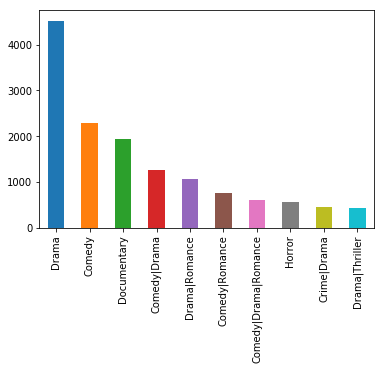

In [119]:
genre_count[:10].plot(kind = 'bar')

In [120]:
is_highly_rated = ratings['rating'] >= 4.0

In [121]:
ratings[is_highly_rated][:10]

,userId,movieId,flag,rating
6,1,151,0,4.0
7,1,223,0,4.0
8,1,253,1,4.0
9,1,260,0,4.0
10,1,293,0,4.0
11,1,296,0,4.0
12,1,318,0,4.0
15,1,541,0,4.0
22,1,1036,0,4.0
23,1,1079,0,4.0


In [123]:
is_animation = movies.genres.str.contains('Animation')

In [124]:
movies[is_animation][:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [125]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [128]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()

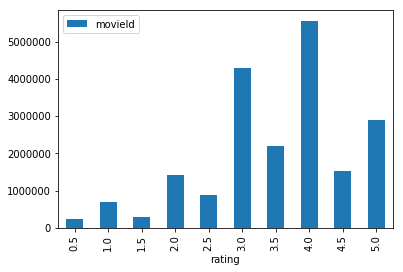

In [129]:
ratings_count.plot(kind = 'bar')

In [130]:
avg_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D000BEC860>]],
      dtype=object)

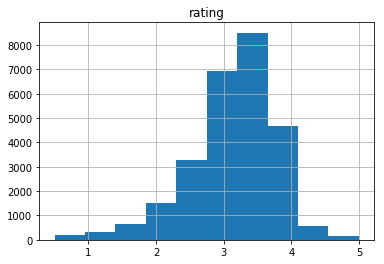

In [131]:
avg_rating.hist()

In [ ]:
movie_avg_score = ratings[['movieId', 'rating']].groupby('movieId').mean()
movie_avg_score.sort_values(by = 'rating', ascending=False).head()

In [26]:
ratings = pd.read_csv('./movielens/ratings.csv', sep = ',', parse_dates=['timestamp'])

In [27]:
ratings_count = ratings.groupby('rating').count()

In [29]:
ratings_count.head()

,userId,movieId,timestamp
rating,,,
0.5,239125,239125,239125
1.0,680732,680732,680732
1.5,279252,279252,279252
2.0,1430997,1430997,1430997
2.5,883398,883398,883398


In [32]:
%matplotlib inline

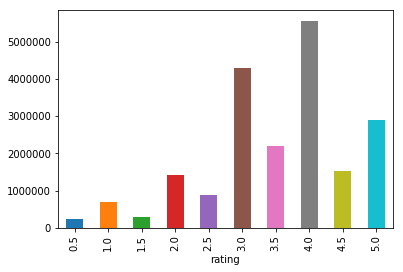

In [35]:
ratings_count['userId'].plot(kind = 'bar')

In [38]:
ratings_count1 = ratings.rating.value_counts()

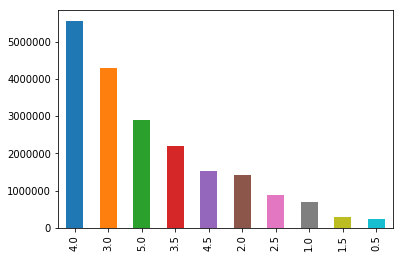

In [39]:
ratings_count1.plot(kind = 'bar')

In [46]:
avg_ratings= ratings.groupby('movieId').mean()

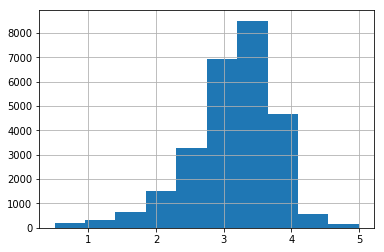

In [47]:
avg_ratings.rating.hist()

In [48]:
avg_ratings.head()

,userId,rating
movieId,,
1,69282.396821,3.921240
2,69169.928202,3.211977
3,69072.079388,3.151040
4,69652.913280,2.861393
5,69113.475454,3.064592


In [54]:
avg_ratings.sort_values(by = ['rating', 'userId'], ascending = False).head()

,userId,rating
movieId,,
93707,135399.0,5.0
93967,135399.0,5.0
94431,135399.0,5.0
94657,135399.0,5.0
94737,135399.0,5.0


In [55]:
avg_rating_user = ratings.groupby('userId').mean()

In [57]:
avg_rating_user.sort_values(by = 'rating', ascending = False).head()

,movieId,rating
userId,,
93230,8917.403846,5.0
116906,325.409091,5.0
39839,33092.111111,5.0
52236,64439.428571,5.0
51442,11101.738095,5.0


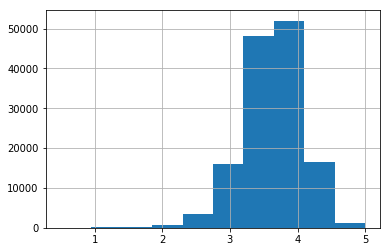

In [58]:
avg_rating_user.rating.hist()

In [59]:
tags = pd.read_csv('./movielens/tags.csv', sep = ',')

In [60]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [62]:
movies = pd.read_csv('./movielens/movies.csv', sep = ',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
t = movies.merge(tags, on = 'movieId', how = 'left')

In [64]:
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644.0,Watched,1.417737e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,computer animation,1.183903e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Disney animated feature,1.183933e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Pixar animation,1.183935e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,TÃ©a Leoni does not star in this movie,1.245094e+09


In [65]:
avg_ratings = ratings.groupby('movieId', as_index = False).mean()

In [67]:
avg_ratings.head()
del avg_ratings['userId']

In [68]:
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [69]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [70]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [74]:
print(avg_ratings.shape[0])
print()
print(movies.shape[0])

26744

27278


In [75]:
t1 = avg_ratings.merge(movies, on = 'movieId', how = 'inner')

In [78]:
t1.sort_values(by = 'rating', ascending = False).head(20)

,movieId,rating,title,genres
19152,95517,5.0,"Barchester Chronicles, The (1982)",Drama
21842,105846,5.0,Only Daughter (2013),Drama
17703,89133,5.0,Boys (Drenge) (1977),Drama
21656,105187,5.0,Linotype: The Film (2012),Documentary
21658,105191,5.0,Rocaterrania (2009),Documentary|Fantasy
17556,88488,5.0,"Summer Wishes, Winter Dreams (1973)",Drama
25936,126945,5.0,Small Roads (2011),(no genres listed)
21762,105526,5.0,Year Zero: The Silent Death of Cambodia (1979),Documentary
21763,105529,5.0,Stealing a Nation (2004),Documentary
21840,105841,5.0,B-Side (2013),Comedy|Romance


In [81]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.sort_values(by = 'rating').head()

,movieId,title,genres,rating
24647,117630,Double Trouble (1992),Action|Comedy|Crime|Romance,0.5
18913,94327,Diverted (2009),Drama,0.5
26248,128675,Hollow Point (1996),Action|Comedy|Thriller,0.5
20718,101728,Miss Castaway and the Island Girls (2004),Adventure|Comedy|Fantasy,0.5
21273,103769,"Devil's in the Details, The (2013)",Thriller,0.5


In [82]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [83]:
is_comedy = box_office['genres'].str.contains('Comedy')

In [88]:
highly_rated_comedy = box_office[is_comedy& is_highly_rated]

In [93]:
highly_rated_comedy.sort_values(by = 'rating').tail()

,movieId,title,genres,rating
26185,128506,Rent-a-Cat (2012),Comedy|Drama,5.0
23843,113947,"Lady of Chance, A (1928)",Comedy|Drama|Romance,5.0
19971,98761,Shaolin Temple 2: Kids from Shaolin (Shao Lin ...,Action|Comedy,5.0
26421,129526,The Color of Milk (2004),Comedy|Drama,5.0
23559,112790,Going Down in LA-LA Land (2011),Comedy|Drama|Romance,5.0


In [97]:
x = 'hello world'
print(x.str.split())

AttributeError: 'str' object has no attribute 'str'

In [104]:
movie_genres = movies['genres'].str.split('|', expand = True)

In [105]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [106]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [107]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [108]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [109]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [110]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit = 's')

In [111]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [112]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [113]:
greater_than_t = tags['parsed_time']> '2015-02-01'

In [114]:
new_tags = tags[greater_than_t]

In [115]:
new_tags.shape, tags.shape

((12130, 5), (465564, 5))

In [116]:
tags.sort_values(by = 'parsed_time', ascending = True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


In [117]:
avg_ratings = ratings.groupby('movieId', as_index = False).mean()

In [118]:
avg_ratings.head()

,movieId,userId,rating
0,1,69282.396821,3.921240
1,2,69169.928202,3.211977
2,3,69072.079388,3.151040
3,4,69652.913280,2.861393
4,5,69113.475454,3.064592


In [119]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [120]:
joined = movies.merge(avg_ratings, on = 'movieId', how = 'inner')

In [123]:
joined.dtypes

movieId      int64
title       object
genres      object
year        object
userId     float64
rating     float64
dtype: object

In [128]:
joined.year = joined.year.str.split('-',expand = True)

In [130]:
joined.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903',
       '2007', '2008', '2009', '1912', '2010', 'Das Millionenspiel',
       '1913', '2011', '1898', '1899', 'Bicicleta, cullera, poma', '1894',
       

In [134]:
import numpy as np

In [137]:
movies['title'].str.extract('.*\((.*)\).*', expand=True)
new_year = joined.year.replace(r'\s+', np.nan, regex=True)
new_year.unique()


array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903',
       '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898',
       '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013',
       '1

In [139]:
?new_year.astype

In [140]:
joined.year = new_year

In [142]:
joined.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,69282.396821,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,69169.928202,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,69072.079388,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,69652.913280,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,69113.475454,3.064592


In [143]:
joined.isnull().any()

movieId    False
title      False
genres     False
year        True
userId     False
rating     False
dtype: bool

In [145]:
joined = joined.dropna()

In [146]:
joined.isnull().any()

movieId    False
title      False
genres     False
year       False
userId     False
rating     False
dtype: bool

In [147]:
joined.dtypes

movieId      int64
title       object
genres      object
year        object
userId     float64
rating     float64
dtype: object

In [152]:
joined.year = joined.year.replace('1983)', '1983', regex=False)

In [153]:
joined.year = joined.year.astype('int32')

In [154]:
joined.corr()

,movieId,year,userId,rating
movieId,1.000000,0.174645,0.144111,-0.091295
year,0.174645,1.000000,-0.156477,-0.051555
userId,0.144111,-0.156477,1.000000,-0.015334
rating,-0.091295,-0.051555,-0.015334,1.000000


In [161]:
yearly_avg = joined[['year', 'rating']].groupby('year', as_index = False).mean()

In [162]:
yearly_avg.sort_values(by = 'rating').head()

,year,rating
11,1905,2.500000
12,1909,2.750000
117,2015,2.813146
16,1914,2.915280
93,1991,2.991267


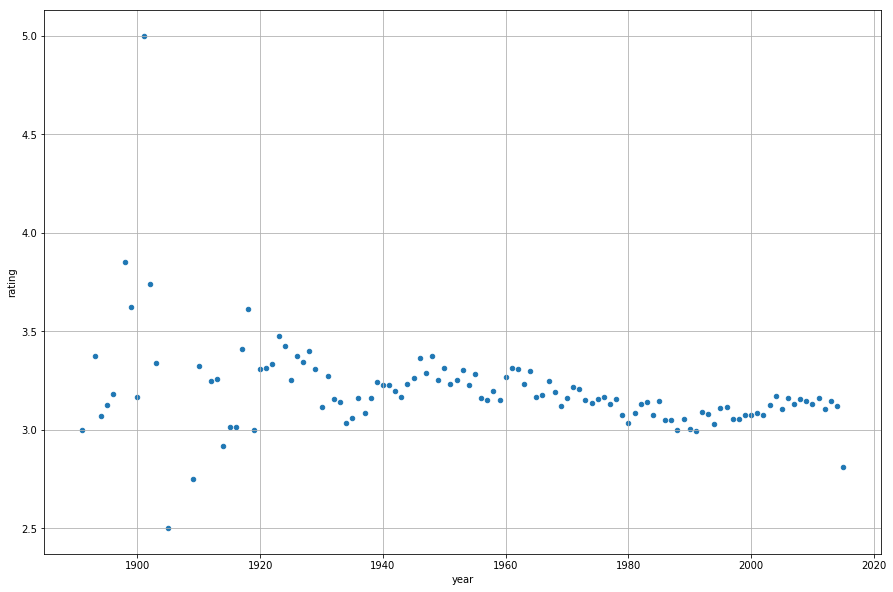

In [165]:
yearly_avg.plot(x='year', y='rating', figsize=(15,10), grid=True, kind= 'scatter')